In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris=pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop(["Id"],axis=1,inplace=True)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris.select_dtypes("object")

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris["Species"]=le.fit_transform(iris["Species"])

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
import seaborn as sns

<AxesSubplot:>

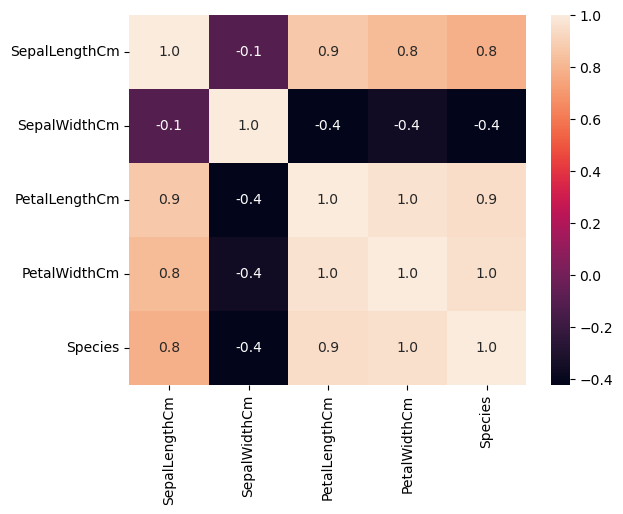

In [12]:
sns.heatmap(iris.corr(),annot=True,fmt="0.1f")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

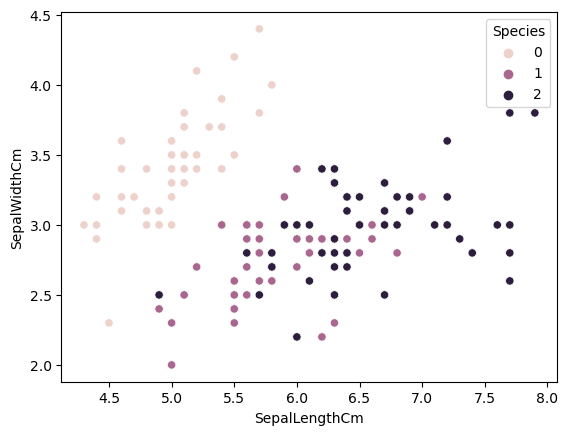

In [13]:
sns.scatterplot(data=iris,x="SepalLengthCm",y="SepalWidthCm",hue="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

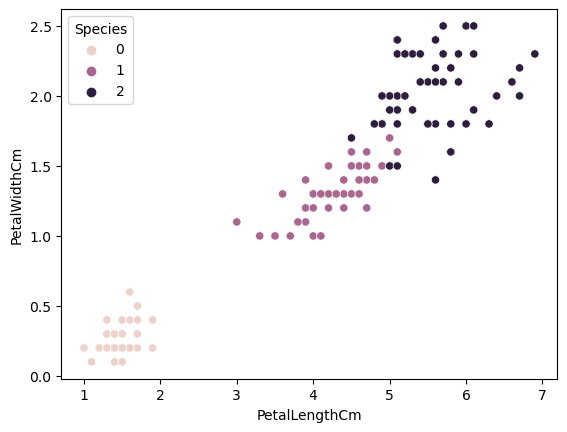

In [14]:
sns.scatterplot(data=iris,x="PetalLengthCm",y="PetalWidthCm",hue="Species")

In [15]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [17]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x1,y1)

SVC()

In [18]:
svm_model.score(x2,y2)*100

100.0

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
knn_model=KNeighborsClassifier()
knn_model.fit(x1,y1)

KNeighborsClassifier()

In [21]:
knn_model=KNeighborsClassifier()
knn_model.fit(x1,y1)

knn_model.score(x2,y2)*100


96.66666666666667

In [22]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x1,y1)
dt_model.score(x2,y2)*100

93.33333333333333

In [23]:
new_data=[5.152,3.75,1.3459,0.195]
new_data=np.asarray(new_data).reshape(1,-1)
result=svm_model.predict(new_data)
if result[0]==0:
    print("setosa")
elif result[0]==1:
    print("Versicolor")
else:
    print("Virginica")

setosa


C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
import pickle as pkl
filepath="saved_model.sav"
pkl.dump(svm_model,open(filepath,"bw"))

In [25]:
import pickle as pkl
load_model=pkl.load(open("saved_model.sav","br"))

In [26]:
load_model

SVC()

In [27]:
import numpy as np
new_data=[5.152,3.75,1.3459,0.195]
new_data=np.asarray(new_data).reshape(1,-1)
result=load_model.predict(new_data)
if result[0]==0:
    print("setosa")
elif result[0]==1:
    print("Versicolor")
else:
    print("Virginica")

setosa


C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
